## Assignment 1 (50 marks)
#### =====================================================================================================
### Deadline: 02/12 11:59 pm
#### =====================================================================================================

### Problem 1: SVM Classification (35 marks)

`lab01_dataset_1.xlsx` contains the claim history of 27,513 homeowner policies. The following table describes the eleven columns in the dataset.

| Name | Description |
| --- | --- |
| policy | Policy Identifier |
| exposure | Duration a Policy exposed in a Year |
| num_claims | Number of Claims in a Year |
| amt_claims | Total Claim Amount in a Year	|
| f_primary_age_tier | Age Tier of Primary Insured |
| f_primary_gender | Gender of Primary Insured |
| f_marital | Marital Status of Primary Insured |
| f_residence_location | Location of Residence Property |
| f_fire_alarm_type | Fire Alarm Type |
| f_mile_fire_station | Distance to Nearest Fire Station |
| f_aoi_tier | Amount of Insurance Tier |

We want to predict the *Frequency* which is the *number of claims per unit of exposure* using the above features.  We first divide the reported number of claims by the exposure. This gives us the *Frequency*.  Next, we put the policies into five groups according to their *Frequency* values. We will use this *Group* as our target variable which has five classes.

| Group | Values |
| :--- | :--- |
| 0 | Frequency = 0 |
| 1 | 0 < Frequency <= 1 |
| 2 | 1 < Frequency <= 2 |
| 3 | 2 < Frequency <= 3 |
| 4 | 3 < Frequency |


### 1.a (6 marks)
Create a new column for the dataset which will indiciate the *Frequency Group* and output the updated dataset.

In [35]:
import pandas as pd

data = pd.read_excel('lab01_dataset_1 (1).xlsx')
data['Frequency Group'] = data['num_claims'] / data['exposure']
def freq_group(freq):
    if freq == 0:
        return 0
    elif freq <= 1:
        return 1
    elif freq <= 2:
        return 2
    elif freq <= 3:
        return 3
    else:
        return 4
data['Frequency Group'] = data['Frequency Group'].apply(freq_group)
data

,policy,exposure,num_claims,amt_claims,f_primary_age_tier,f_primary_gender,f_marital,f_residence_location,f_fire_alarm_type,f_mile_fire_station,f_aoi_tier,Frequency Group
0,P00001,1.00,0,0.00,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K,0
1,G00002,1.00,0,0.00,38 - 60,Male,Un-Married,Suburban,NaN,1 - 5 miles,< 100K,0
2,A00003,1.00,2,3079.01,38 - 60,Female,Married,Suburban,Standalone,< 1 mile,100K - 350K,2
3,P00004,1.00,1,804.87,28 - 37,Female,Un-Married,Suburban,Standalone,1 - 5 miles,< 100K,1
4,G00005,1.00,1,638.74,28 - 37,Female,Un-Married,Suburban,Alarm Service,< 1 mile,100K - 350K,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27508,Z27509,1.00,0,0.00,38 - 60,Male,Married,Urban,NaN,< 1 mile,100K - 350K,0
27509,Z27510,1.00,1,1246.57,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K,1
27510,G27511,1.00,1,18.36,28 - 37,Male,Un-Married,Suburban,Standalone,1 - 5 miles,100K - 350K,1
27511,P27512,0.11,0,0.00,38 - 60,Male,Married,Suburban,Standalone,< 1 mile,100K - 350K,0


### 1.b (6 marks)
There are seven categorial features in the dataset namely, *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location*. Display all the unique values of these seven categories.

In [36]:
aoi_unique = data['f_aoi_tier'].unique()
age_unique = data['f_primary_age_tier'].unique()
fire_unique = data['f_fire_alarm_type'].unique()
marital_unique = data['f_marital'].unique()
mile_unique = data['f_mile_fire_station'].unique()
gender_unique = data['f_primary_gender'].unique()
residence_unique = data['f_residence_location'].unique()
print(f"The unique values of f_aoi_tier are: {aoi_unique}.")
print(f"The unique values of f_primary_age_tier are: {age_unique}.")
print(f"The unique values of f_fire_alarm_type are: {fire_unique}.")
print(f"The unique values of f_marital are: {marital_unique}.")
print(f"The unique values of f_mile_fire_station are: {mile_unique}.")
print(f"The unique values of f_primary_gender are: {gender_unique}.")
print(f"The unique values of f_residence_location are: {residence_unique}.")

The unique values of f_aoi_tier are: ['351K - 600K' '< 100K' '100K - 350K' '601K - 1M' '> 1M'].
The unique values of f_primary_age_tier are: ['21 - 27' '38 - 60' '28 - 37' '> 60' '< 21'].
The unique values of f_fire_alarm_type are: ['Alarm Service' nan 'Standalone'].
The unique values of f_marital are: ['Married' 'Un-Married' 'Not Married'].
The unique values of f_mile_fire_station are: ['< 1 mile' '1 - 5 miles' '> 10 miles' '6 - 10 miles'].
The unique values of f_primary_gender are: ['Male' 'Female'].
The unique values of f_residence_location are: ['Urban' 'Suburban' 'Rural'].


### 1.c (6 marks)
We will train SVM models using those seven categorical features. However, their values are currently all categorical data, but SVM requires them to be numerical. Perform ***one-hot encoding*** on these features to obtain an updated dataset which has only numerical values.

In [37]:

categorical_columns = [
    'f_aoi_tier', 
    'f_primary_age_tier',
    'f_fire_alarm_type',
    'f_marital',
    'f_mile_fire_station',
    'f_primary_gender',
    'f_residence_location'
]
encoded_data = pd.get_dummies(data, columns=categorical_columns, dtype=int, drop_first=True)
encoded_data

,policy,exposure,num_claims,amt_claims,Frequency Group,f_aoi_tier_351K - 600K,f_aoi_tier_601K - 1M,f_aoi_tier_< 100K,f_aoi_tier_> 1M,f_primary_age_tier_28 - 37,...,f_primary_age_tier_> 60,f_fire_alarm_type_Standalone,f_marital_Not Married,f_marital_Un-Married,f_mile_fire_station_6 - 10 miles,f_mile_fire_station_< 1 mile,f_mile_fire_station_> 10 miles,f_primary_gender_Male,f_residence_location_Suburban,f_residence_location_Urban
0,P00001,1.00,0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,G00002,1.00,0,0.00,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,A00003,1.00,2,3079.01,2,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,P00004,1.00,1,804.87,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,G00005,1.00,1,638.74,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27508,Z27509,1.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
27509,Z27510,1.00,1,1246.57,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
27510,G27511,1.00,1,18.36,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
27511,P27512,0.11,0,0.00,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0


### 1.d (6 marks)
Divide the observations into training and testing partitions. Observations whose *Policy Identifier* starts with the letters A, G, and P will go to the training partition. The remaining observations go to the testing partition. Output the total number of policies present in the Training partition and Testing partition.

In [38]:

mask = encoded_data['policy'].str[0].isin(['A', 'G', 'P'])

training_data = encoded_data[mask]
testing_data = encoded_data[~mask]

feature_columns = [col for col in encoded_data.columns 
                  if col.startswith(('f_'))]


X_train = training_data[feature_columns].values
y_train = training_data['Frequency Group'].values
X_test = testing_data[feature_columns].values
y_test = testing_data['Frequency Group'].values

print(f"Number of policies in Training partition: {len(training_data)}")
print(f"Number of policies in Testing partition: {len(testing_data)}")
print(f"Total number of policies: {len(encoded_data)}")


Number of policies in Training partition: 20661
Number of policies in Testing partition: 6852
Total number of policies: 27513


### 1.e (6 marks)
Train an SVM model using [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). The input features will be the encoded version of the feature set *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location* and the output is the *Frequency Group*. Use `verbose=1` to observe the optimization steps during the training process.

In [43]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


svm_model = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=0, 
              verbose=1, 
              class_weight='balanced')
)
print(X_train.shape)
print(y_train.shape)

svm_model.fit(X_train, y_train)
print("Training complete")








(20661, 17)
(20661,)
[LibLinear]iter  1 act 2.340e+03 pre 2.340e+03 delta 4.071e-01 f 1.346e+04 |g| 1.166e+04 CG   2
iter  2 act 3.328e+01 pre 3.328e+01 delta 4.071e-01 f 1.112e+04 |g| 8.172e+02 CG   6
iter  3 act 6.827e-02 pre 6.827e-02 delta 4.071e-01 f 1.108e+04 |g| 5.292e+01 CG   3
iter  4 act 2.285e-03 pre 2.285e-03 delta 4.071e-01 f 1.108e+04 |g| 4.208e+00 CG   6
iter  1 act 6.527e+03 pre 6.527e+03 delta 5.769e-01 f 1.951e+04 |g| 2.263e+04 CG   1
iter  2 act 1.539e+01 pre 1.539e+01 delta 5.769e-01 f 1.298e+04 |g| 1.118e+03 CG   3
iter  3 act 1.319e-01 pre 1.319e-01 delta 5.769e-01 f 1.296e+04 |g| 9.581e+01 CG   4
iter  4 act 4.694e-03 pre 4.694e-03 delta 5.769e-01 f 1.296e+04 |g| 9.301e+00 CG   5
iter  5 act 6.839e-06 pre 6.839e-06 delta 5.769e-01 f 1.296e+04 |g| 6.937e-01 CG   3
iter  1 act 9.084e+03 pre 9.084e+03 delta 6.380e-01 f 2.237e+04 |g| 2.848e+04 CG   1
iter  2 act 5.823e+01 pre 5.823e+01 delta 6.380e-01 f 1.329e+04 |g| 1.420e+03 CG   6
iter  3 act 3.316e-01 pre 3.316e-

### 1.f (5 marks)
Compute and output the Accuracy Score on the Testing partition.

In [40]:
score = svm_model.score(X_test, y_test)
print(f"Accuracy Score on the Testing partition: {score}")

Accuracy Score on the Testing partition: 0.5014594279042616


### Problem 2: Perceptron Learning (15 marks)

The dataset `lab01_dataset_2.csv` has a *3-dimensional input space* and a class label of *Positive* and *Negative*. For this task, you are **not allowed** to use any *functionalities* of the `sklearn` module.

### 2.a (10 marks)
Write a function `my_perceptron()` which applies the perceptron algorithm (refer to the lecture slide covering linear separators for details of this algorithm) on the dataset to create a linear separator. `my_perceptron()` takes the dataset as its input and returns a ***3-dimensional weight vector*** which can be used to create the linear separator (assume `bias = 0`). Use the *initial weights* `w = [1,2,3]`. Use a classification threshold of `99%` i.e., `my_perceptron()` will terminate once the misclassification rate is less than `1%`.

In [31]:
import pandas as pd
import numpy as np
data_path = "/Users/thuptenwangpo/Documents/GitHub/CS584/assignment1/lab01_dataset_2 (1).csv"
data = pd.read_csv(data_path)

def init():
    # Initialize weights and time and threshold
    w = [1, 2, 3]
    t = 1
    threshold = .01
    return w, t, threshold

def check_done(error_rate, threshold, t):
    # Check if the error rate is less than the threshold
    if error_rate <= threshold:
        return True
    return False

def update_weights(w, x, label):
    # Update the weights based slides
    if label == 1:
        w = [w[i] + x[i] for i in range(3)]
    else:
        w = [w[i] - x[i] for i in range(3)]
    return w

def predict_label(w, x):
    # Predict the label based on the weights and the input
    prediction = sum(w[i] * x[i] for i in range(3))
    return 1 if prediction >= 0 else -1

def my_perceptron(data):
    # perform the perceptron algorithm
    w, t, threshold = init()
    
    while True:
        mistakes = 0
        total = len(data)
        
        print(f"Starting w: {w}")
        
        
        for _, row in data.iterrows():
            x = [row.iloc[0], row.iloc[1], row.iloc[2]]
            label = 1 if row.iloc[3] == 'Positive' else -1
            
            prediction = predict_label(w, x)
            
            if prediction != label:
                mistakes += 1
                w = update_weights(w, x, label)
                print(f"Updated w: {w}")
        
        error_rate = mistakes / total
        print(f"Error rate: {error_rate:.4f} achieved at t = {t}")
        
        if check_done(error_rate, threshold, t):
            break
            
        t += 1 
    
    return w

my_perceptron(data)

Starting w: [1, 2, 3]
Updated w: [-3.6187485082363526, 3.8285969746548396, 2.294739286550274]
Updated w: [-0.6536302662703912, 5.55434389980206, 2.221430485441772]
Error rate: 0.0100 achieved at t = 1


[-0.6536302662703912, 5.55434389980206, 2.221430485441772]

### 2.b (5 marks)
Create a *3D plot* which showcases the dataset in a 3D-space alongwith the *linear separator* you obtained from `my_perceptron()`. Use two different colors to represent the data points belonging in the two classes for ease of viewing.

Starting w: [1, 2, 3]
Updated w: [-3.6187485082363526, 3.8285969746548396, 2.294739286550274]
Updated w: [-0.6536302662703912, 5.55434389980206, 2.221430485441772]
Error rate: 0.0100 achieved at t = 1


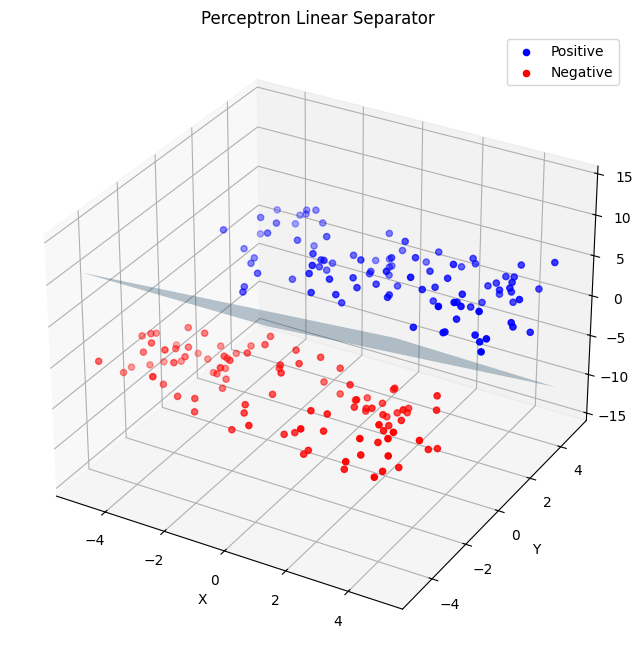

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_perceptron_3d(data, weights):
    # plot the data and the linear separator
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for label in ['Positive', 'Negative']:
        mask = data.iloc[:, 3] == label
        points = data[mask].iloc[:, 0:3]
        color = 'blue' if label == 'Positive' else 'red'
        ax.scatter(points.iloc[:, 0], points.iloc[:, 1], points.iloc[:, 2], 
                  c=color, label=label)
    
    xx, yy = np.meshgrid(np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max(), 10),
                        np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max(), 10))
    
    z = (-weights[0] * xx - weights[1] * yy) / weights[2]
    
    ax.plot_surface(xx, yy, z, alpha=0.3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title('Perceptron Linear Separator')
    plt.show()

weights = my_perceptron(data)

plot_perceptron_3d(data, weights)